In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCDSeg import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [3]:
PASCAL_DEMO_IMAGE_PATH = r"src\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r"src\data\demoPascal\2010_005258.jpg"

In [4]:
PASCAL_DEMO_SCRIBBLE_PATH = r"src\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r"src\data\demoPascal\2010_005258.xml"

In [5]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH1            
)

In [6]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH1
)

In [7]:
n_classes = sample_scribble.get_n_classes()

In [8]:
segmenter = SVCDSeg(
    n_classes,
    #alpha = 13.0, 
    #sigma = 18.0,
    max_iter = 250,
    debug = 1
)

In [9]:
fitted_segmentation = segmenter.fit(
    sample_image,
    sample_scribble 
)

  0%|          | 0/250 [00:00<?, ?it/s]

dtype float64

self.fitted_prior 0.0


c:\Users\lollo\Desktop\GM\T2_DSBA_Graphical_Methods\src\lib\probabilityEstim\Likelihood.py:162: RuntimeWarning: invalid value encountered in divide
  kde_likelihood_map /= np.sum(kde_likelihood_map, axis = 0) # normalize to sum to one over each class
100%|██████████| 250/250 [01:11<00:00,  3.48it/s]


Text(0.5, 1.0, 'Prior history')

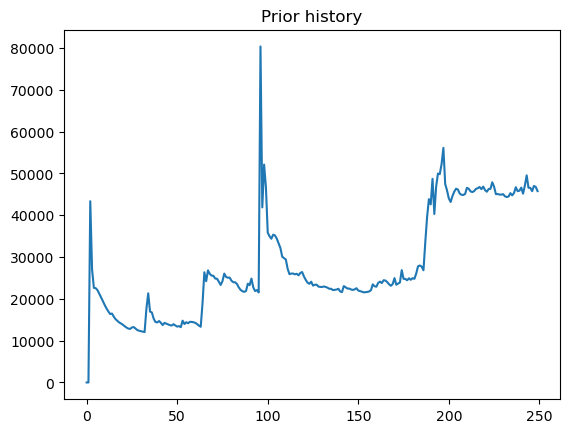

In [15]:
fig, ax = plt.subplots()

ax.plot(segmenter.prior_history)
ax.set_title("Prior history")


Text(0.5, 1.0, 'Primal energy history')

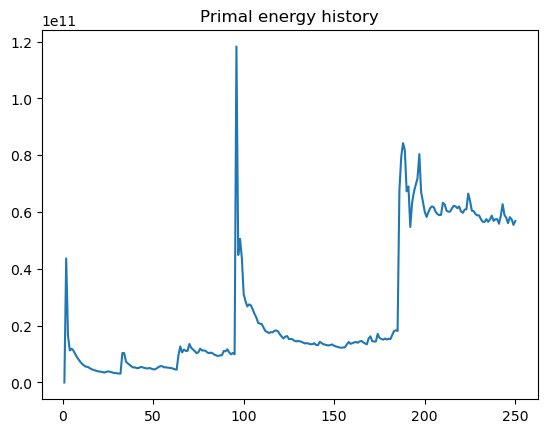

In [17]:
fig, ax = plt.subplots()
ax.plot(segmenter.primal_energy_history)
ax.set_title("Primal energy history")


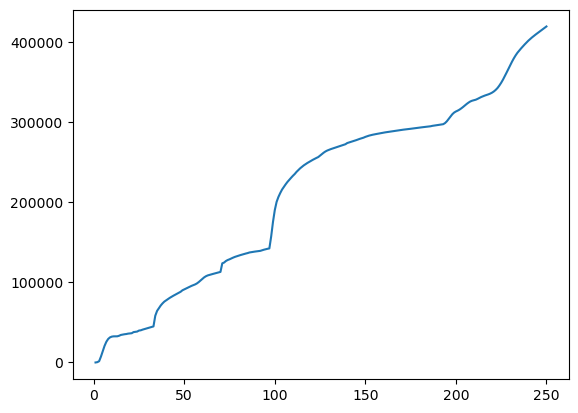

In [11]:
fig, ax = plt.subplots()

ax.plot(segmenter.dual_energy_history)
#ax.plot(segmenter.primal_energy_history)
#plt.show()


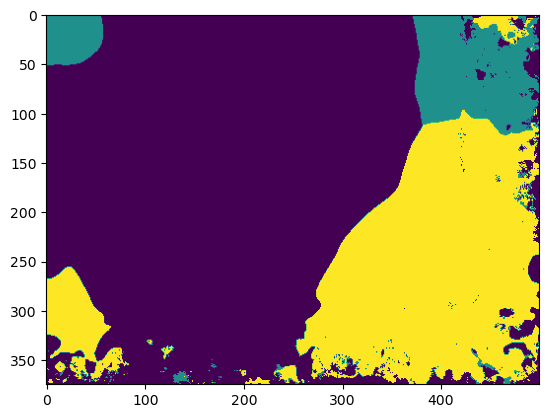

In [12]:
fitted_segmentation = segmenter.theta
segmentation_max = np.argmax(fitted_segmentation, axis = 0)
plt.imshow(segmentation_max.transpose(1, 0))
plt.show()
plt.close()